In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle

In [7]:
# Network Architecture
ILS = 1 #Input layer size
NL, LS = 5, 10 # Number of hidden layers and their size

# Initialize weights
def init_w(ils=ILS, nl=NL, ls=LS):
    nu = [ils] + [ls] * nl
    w = []
    for l in range(nl):
        w.append([])
        for i in range(nu[l]):
            w[l].append([])
            for j in range(nu[l+1]):
                w[l][i].append(2*(np.random.uniform()-.5)**1)
    w.append([[(2*(np.random.uniform()-.5))**1 for i in range(nu[nl])]])

        
    return w

# Import weights
def import_w(file):
    with open(file, 'rb') as f:
        w = pickle.load(f)
    return w
    
# Compute output
def compute_output(invals, w, activation_fun):
    # Input layer
    cl = np.array(invals)
    # Hidden layers
    for l in range(len(w)-1):
        #print(len(w[l][0]))
        cl = np.array([np.sum([w[l][i][j]*cl[i] for i in range(len(cl))]) for j in range(len(w[l][0]))])
        if activation_fun=='tanh':
            cl = np.tanh(cl)
        elif activation_fun=='ReLU':
            cl=[cl_i if cl_i>0 else 0 for cl_i in cl]
        elif activation_fun=='leaky_ReLU':
            cl=[cl_i if cl_i>0 else 0.01*cl_i for cl_i in cl]
            
        
    return(np.sum([w[-1][i][0] * cl[i] for i in range(len(w[-1]))]))

In [8]:
NREP = 10
d_all = pd.DataFrame({'x1' : [], 'y': [], 'rep': []})
d_all_raw = pd.DataFrame({'x1' : [], 'y_raw': [], 'rep': []})

activation_function='leaky_ReLU' #tanh, leaky_ReLU


#load pickle with NN weights
filename = 'NN_weights_' + activation_function + '_NREP_10_.pickle'
weights = import_w('../data/backup/' + filename)

#load low-resolution non-normalized original data
low_res_data=pd.read_csv('../data/backup/' + 'Non_normalized_NN_function_'+ str(activation_function) + '_NREP_10_data.csv');
low_res_data=low_res_data.drop(['Unnamed: 0'], axis=1)

    
for rep in range(NREP):
    #load pickle with weights
    w=weights[rep]

    #Generate x
    step=0.1
    x1 = np.arange(-4, 4, step)

    #Generate y
    x1s, ys = [], []
    y = [compute_output([1, thisx1], w, activation_function) for thisx1 in x1]
    x1s=x1
    ys=y
    ys = np.array(ys)

    # Normalize y to [0, 1] with lower resolution data
    low_res_rep=low_res_data[low_res_data['rep']==rep]
    ys_low_res=np.array(low_res_rep.y_raw)
    ys_norm = (ys - min(ys_low_res)) / (max(ys_low_res) - min(ys_low_res) + 1e-15)
    

    #Put as dataframe
    d = pd.DataFrame({'x1' : x1s, 'y' : ys_norm, 'rep': rep})
    display(d)
    display(low_res_rep)
    d_all=pd.concat([d_all,d])
    
    #Save non-normalized version
    d_raw = pd.DataFrame({'x1' : x1s, 'y_raw' : ys, 'rep': rep})
    d_all_raw=pd.concat([d_all_raw,d_raw])

#Save to dataframe
save=True
if save==True:
    #with open('../Data/' + 'NN_weights_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_' + '.pickle', 'wb') as f:
    #    pickle.dump(weights, f, protocol=None)

    d_all.to_csv('../data/generative_data/' + 'NN_function_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_data.csv')
    d_all_raw.to_csv('../data/generative_data/' + 'Non_normalized_NN_function_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_data.csv')

,x1,y,rep
0,-4.0,0.018426,0
1,-3.9,0.017699,0
2,-3.8,0.016971,0
3,-3.7,0.016244,0
4,-3.6,0.015516,0
...,...,...,...
75,3.5,0.902288,0
76,3.6,0.924001,0
77,3.7,0.945715,0
78,3.8,0.967429,0


,x1,y_raw,rep
0,-4.00,0.000866,0.0
1,-3.95,0.000858,0.0
2,-3.90,0.000849,0.0
3,-3.85,0.000840,0.0
4,-3.80,0.000832,0.0
...,...,...,...
155,3.75,0.023269,0.0
156,3.80,0.023528,0.0
157,3.85,0.023788,0.0
158,3.90,0.024047,0.0


,x1,y,rep
0,-4.0,1.000000,1
1,-3.9,0.999929,1
2,-3.8,0.999857,1
3,-3.7,0.999786,1
4,-3.6,0.999714,1
...,...,...,...
75,3.5,0.122541,1
76,3.6,0.095310,1
77,3.7,0.068078,1
78,3.8,0.040847,1


,x1,y_raw,rep
160,-4.00,0.000854,1.0
161,-3.95,0.000828,1.0
162,-3.90,0.000802,1.0
163,-3.85,0.000776,1.0
164,-3.80,0.000750,1.0
...,...,...,...
315,3.75,-0.687612,1.0
316,3.80,-0.697526,1.0
317,3.85,-0.707440,1.0
318,3.90,-0.717354,1.0


,x1,y,rep
0,-4.0,0.000000,2
1,-3.9,0.022372,2
2,-3.8,0.044743,2
3,-3.7,0.067115,2
4,-3.6,0.089486,2
...,...,...,...
75,3.5,0.283569,2
76,3.6,0.251095,2
77,3.7,0.218622,2
78,3.8,0.186148,2


,x1,y_raw,rep
320,-4.00,-2.636353,2.0
321,-3.95,-2.613393,2.0
322,-3.90,-2.590433,2.0
323,-3.85,-2.567473,2.0
324,-3.80,-2.544513,2.0
...,...,...,...
475,3.75,-2.220939,2.0
476,3.80,-2.254267,2.0
477,3.85,-2.287594,2.0
478,3.90,-2.320921,2.0


,x1,y,rep
0,-4.0,1.000000,3
1,-3.9,0.999998,3
2,-3.8,0.999996,3
3,-3.7,0.999994,3
4,-3.6,0.999992,3
...,...,...,...
75,3.5,0.081067,3
76,3.6,0.063052,3
77,3.7,0.045037,3
78,3.8,0.027022,3


,x1,y_raw,rep
480,-4.00,0.001678,3.0
481,-3.95,0.001657,3.0
482,-3.90,0.001636,3.0
483,-3.85,0.001615,3.0
484,-3.80,0.001594,3.0
...,...,...,...
635,3.75,-20.775789,3.0
636,3.80,-20.969937,3.0
637,3.85,-21.164085,3.0
638,3.90,-21.358233,3.0


,x1,y,rep
0,-4.0,1.000000,4
1,-3.9,0.998713,4
2,-3.8,0.997425,4
3,-3.7,0.996138,4
4,-3.6,0.994850,4
...,...,...,...
75,3.5,0.104446,4
76,3.6,0.081236,4
77,3.7,0.058025,4
78,3.8,0.034815,4


,x1,y_raw,rep
640,-4.00,-0.116829,4.0
641,-3.95,-0.118723,4.0
642,-3.90,-0.120618,4.0
643,-3.85,-0.122512,4.0
644,-3.80,-0.124406,4.0
...,...,...,...
795,3.75,-2.922962,4.0
796,3.80,-2.957113,4.0
797,3.85,-2.991264,4.0
798,3.90,-3.025414,4.0


,x1,y,rep
0,-4.0,0.865867,5
1,-3.9,0.871023,5
2,-3.8,0.876848,5
3,-3.7,0.883232,5
4,-3.6,0.889616,5
...,...,...,...
75,3.5,0.158231,5
76,3.6,0.123068,5
77,3.7,0.087906,5
78,3.8,0.052744,5


,x1,y_raw,rep
800,-4.00,-0.986591,5.0
801,-3.95,-0.974147,5.0
802,-3.90,-0.961703,5.0
803,-3.85,-0.948996,5.0
804,-3.80,-0.933587,5.0
...,...,...,...
955,3.75,-4.826783,5.0
956,3.80,-4.911650,5.0
957,3.85,-4.996517,5.0
958,3.90,-5.081384,5.0


,x1,y,rep
0,-4.0,0.435815,6
1,-3.9,0.417875,6
2,-3.8,0.399935,6
3,-3.7,0.381995,6
4,-3.6,0.364054,6
...,...,...,...
75,3.5,0.901979,6
76,3.6,0.923762,6
77,3.7,0.945544,6
78,3.8,0.967326,6


,x1,y_raw,rep
960,-4.00,0.016874,6.0
961,-3.95,0.016627,6.0
962,-3.90,0.016380,6.0
963,-3.85,0.016133,6.0
964,-3.80,0.015886,6.0
...,...,...,...
1115,3.75,0.031213,6.0
1116,3.80,0.031513,6.0
1117,3.85,0.031813,6.0
1118,3.90,0.032113,6.0


,x1,y,rep
0,-4.0,1.000000,7
1,-3.9,0.974239,7
2,-3.8,0.948013,7
3,-3.7,0.921787,7
4,-3.6,0.895561,7
...,...,...,...
75,3.5,0.864301,7
76,3.6,0.887532,7
77,3.7,0.910763,7
78,3.8,0.933994,7


,x1,y_raw,rep
1120,-4.00,3.566491,7.0
1121,-3.95,3.524012,7.0
1122,-3.90,3.480396,7.0
1123,-3.85,3.436572,7.0
1124,-3.80,3.392748,7.0
...,...,...,...
1275,3.75,3.307078,7.0
1276,3.80,3.345897,7.0
1277,3.85,3.383584,7.0
1278,3.90,3.416139,7.0


,x1,y,rep
0,-4.0,0.977514,8
1,-3.9,0.941708,8
2,-3.8,0.906174,8
3,-3.7,0.871166,8
4,-3.6,0.836158,8
...,...,...,...
75,3.5,0.886883,8
76,3.6,0.912221,8
77,3.7,0.937559,8
78,3.8,0.962896,8


,x1,y_raw,rep
1280,-4.00,0.019191,8.0
1281,-3.95,0.018883,8.0
1282,-3.90,0.018575,8.0
1283,-3.85,0.018268,8.0
1284,-3.80,0.017965,8.0
...,...,...,...
1435,3.75,0.018722,8.0
1436,3.80,0.018940,8.0
1437,3.85,0.019158,8.0
1438,3.90,0.019371,8.0


,x1,y,rep
0,-4.0,0.741952,9
1,-3.9,0.749842,9
2,-3.8,0.757731,9
3,-3.7,0.765620,9
4,-3.6,0.773509,9
...,...,...,...
75,3.5,0.114630,9
76,3.6,0.089156,9
77,3.7,0.063683,9
78,3.8,0.038210,9


,x1,y_raw,rep
1440,-4.00,-1.292494,9.0
1441,-3.95,-1.275755,9.0
1442,-3.90,-1.259016,9.0
1443,-3.85,-1.242278,9.0
1444,-3.80,-1.225539,9.0
...,...,...,...
1595,3.75,-4.224730,9.0
1596,3.80,-4.278777,9.0
1597,3.85,-4.332825,9.0
1598,3.90,-4.386872,9.0


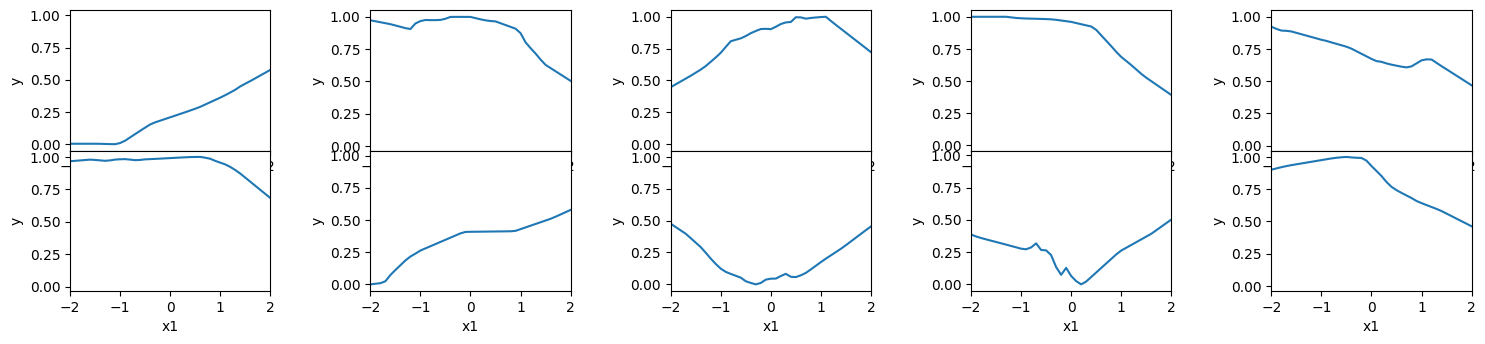

In [9]:
#PLOT -2,2

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]

rows=2;cols=5
gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.5,hspace=0.0)

#Plot train rank (-2,2)
h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.set_xlim(-2,2)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_high_res_step' +str(step) + activation_function + 'ILS%d_NL%d_LS%d'  %(ILS, NL,  LS) + '.png', dpi=300)


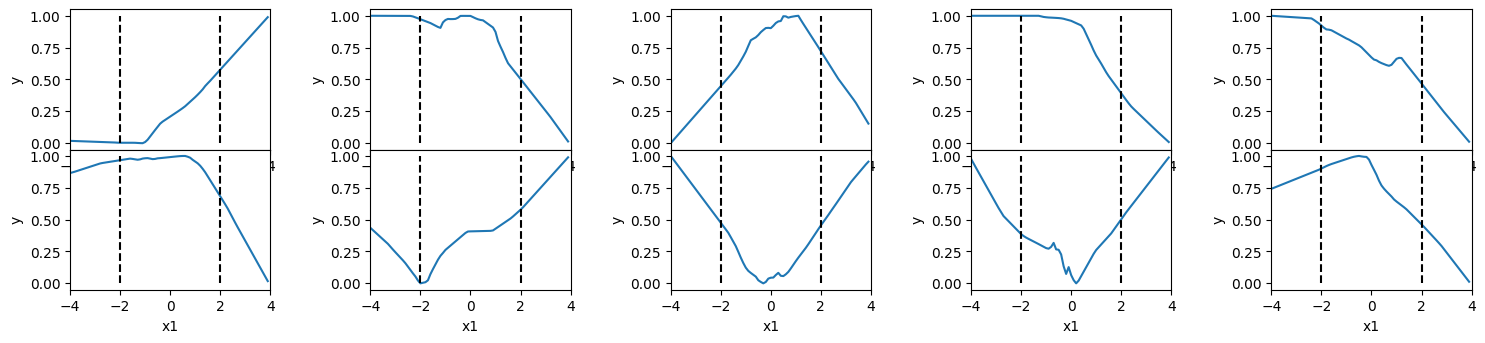

In [10]:
#PLOT FULL RANK (-4,4)

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]


h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.vlines(x=[-2, 2], ymin=0, ymax=1, color='k',linestyle='--')
        ax_rc.set_xlim(-4,4)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_high_res_step_' +str(step) + activation_function + 'ILS%d_NL%d_LS%d_full_rank'  %(ILS, NL,  LS) + '.png', dpi=300)